this notebook gives the plots for precipitation for the corresponding days that cyclones were present within the bounds of the data. 



# Define Datasets:

In [1]:
# import the necessary packages
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

In [2]:
# load in the dataset
file='/scratch/ldoyle4/subset/precip.nc'
ds = xr.open_dataset(file)

In [3]:
# create the hurricane dictionaries (idk if dictionary is the right word)
def august(month):
    return (month == 8)
def september(month):
    return (month == 9)
def october(month):
    return (month == 10)

In [4]:
ds_august = ds.sel(time=august(ds['time.month']))
ds_sept = ds.sel(time=september(ds['time.month']))
ds_october = ds.sel(time=october(ds['time.month']))

In [5]:
def eleven(year):
    return (year == 2011)
def twelve(year):
    return (year == 2012)
def thirteen(year):
    return (year == 2013)
def fourteen(year):
    return (year == 2014)
def fifteen(year):
    return (year == 2015)
def sixteen(year):
    return (year == 2016)

In [6]:
#august
aug_2011 = ds_august.sel(time=eleven(ds_august['time.year']))
aug_2012 = ds_august.sel(time=twelve(ds_august['time.year']))
aug_2013 = ds_august.sel(time=thirteen(ds_august['time.year']))
aug_2014 = ds_august.sel(time=fourteen(ds_august['time.year']))
aug_2015 = ds_august.sel(time=fifteen(ds_august['time.year']))
aug_2016 = ds_august.sel(time=sixteen(ds_august['time.year']))

In [7]:
#september
sept_2011 = ds_sept.sel(time=eleven(ds_sept['time.year']))
sept_2012 = ds_sept.sel(time=twelve(ds_sept['time.year']))
sept_2013 = ds_sept.sel(time=thirteen(ds_sept['time.year']))
sept_2014 = ds_sept.sel(time=fourteen(ds_sept['time.year']))
sept_2015 = ds_sept.sel(time=fifteen(ds_sept['time.year']))
sept_2016 = ds_sept.sel(time=sixteen(ds_sept['time.year']))

In [8]:
#october
oct_2011 = ds_october.sel(time=eleven(ds_october['time.year']))
oct_2012 = ds_october.sel(time=twelve(ds_october['time.year']))
oct_2013 = ds_october.sel(time=thirteen(ds_october['time.year']))
oct_2014 = ds_october.sel(time=fourteen(ds_october['time.year']))
oct_2015 = ds_october.sel(time=fifteen(ds_october['time.year']))
oct_2016 = ds_october.sel(time=sixteen(ds_october['time.year']))

In [9]:
#2011
def emily(day):
    return (day >= 6) & (day <= 7)
emily_days = aug_2011.sel(time=emily(aug_2011['time.day']))

def irene(day):
    return (day >= 25) & (day <= 27)
irene_days = aug_2011.sel(time=irene(aug_2011['time.day']))

def lee(day):
    return (day >= 2) & (day <= 5)
lee_days = sept_2011.sel(time=lee(sept_2011['time.day']))

In [10]:
#2012
def isaac(day):
    return (day>=27) & (day<=31)
isaac_days = aug_2012.sel(time=isaac(aug_2012['time.day']))

def sandy(day):
    return (day>=26) & (day<=28)
sandy_days = oct_2012.sel(time=sandy(oct_2012['time.day']))

In [11]:
#2013
def karen(day):
    return (day>=3) & (day<=6)
karen_days = oct_2013.sel(time=karen(oct_2013['time.day']))

In [12]:
#2014
def bertha(day):
    return (day>=4) & (day<=5)
bertha_days = aug_2014.sel(time=bertha(aug_2014['time.day']))

In [13]:
#2015
def joaquin(day):
    return (day>=2) & (day<=3)
joaquin_days = oct_2015.sel(time=joaquin(oct_2015['time.day']))


In [14]:
#2016
def hermine1(day):
    return (day>=28) & (day<=31)
hermine1_days = aug_2016.sel(time=hermine1(aug_2016['time.day']))

def hermine2(day):
    return (day>=1) & (day<=3)
hermine2_days = sept_2016.sel(time=hermine2(sept_2016['time.day']))

def julia(day):
    return (day>=13) & (day<=21)
julia_days = sept_2016.sel(time=julia(sept_2016['time.day']))

def matthew(day):
    return (day>=6) & (day<=8)
matthew_days = oct_2016.sel(time=matthew(oct_2016['time.day']))

# 2011 Plots

## Tropical Storm Emily

The following plot cell was used as a trial block to visualize the color levels of each day so I could have 1 colorbar for each subplot. I'm sure there's a more elegant approach but this is what I found worked for me.

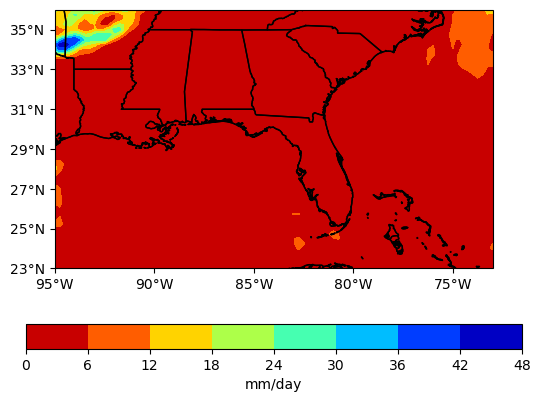

In [60]:
fig = plt.figure()

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contourf(ds.precip['longitude'],ds.precip['latitude'],matthew_days.precip[0,:,:],
            transform = ccrs.PlateCarree(),cmap='jet_r')
ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.coastlines()
        
ax.add_feature(feature.STATES)

cbar = plt.colorbar(cs, orientation='horizontal',label='mm/day') 

Text(0.5, 0.98, 'precip for tropical storm emily')

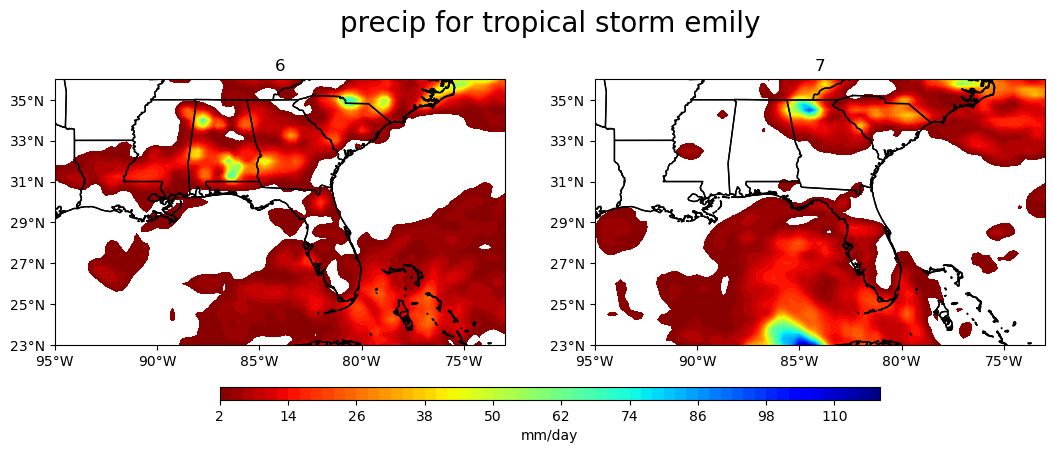

In [46]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(2,120,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=emily_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for tropical storm emily',fontsize=20)

## Hurricane Irene

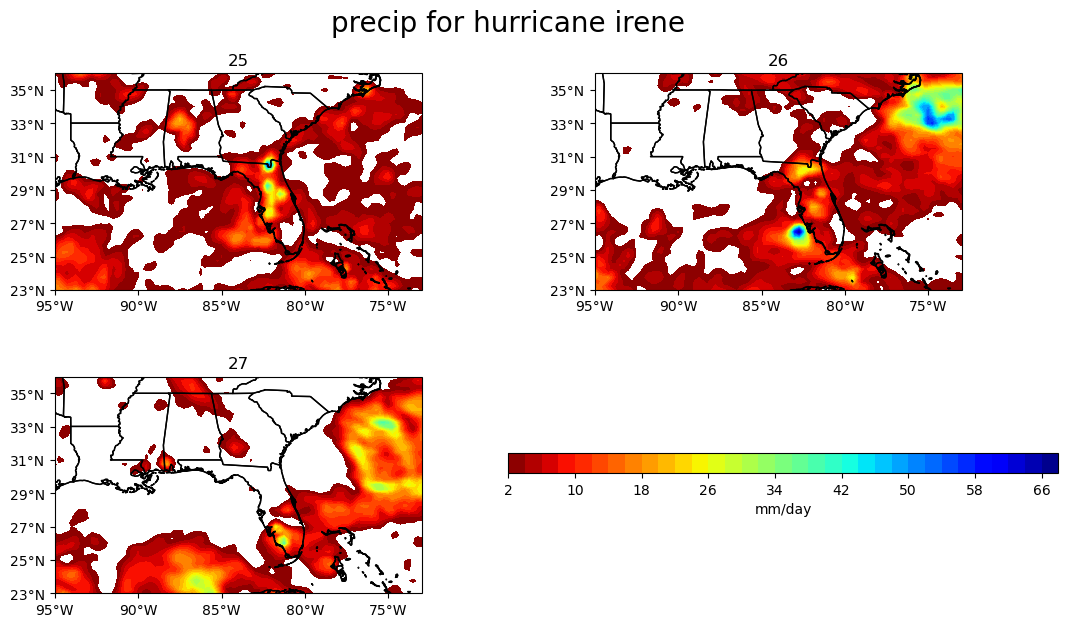

In [38]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,70,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=irene_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.4)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for hurricane irene',fontsize=20)
axs[3].set_axis_off()

## Tropical Storm Lee

Text(0.5, 0.98, 'precip for tropical storm lee')

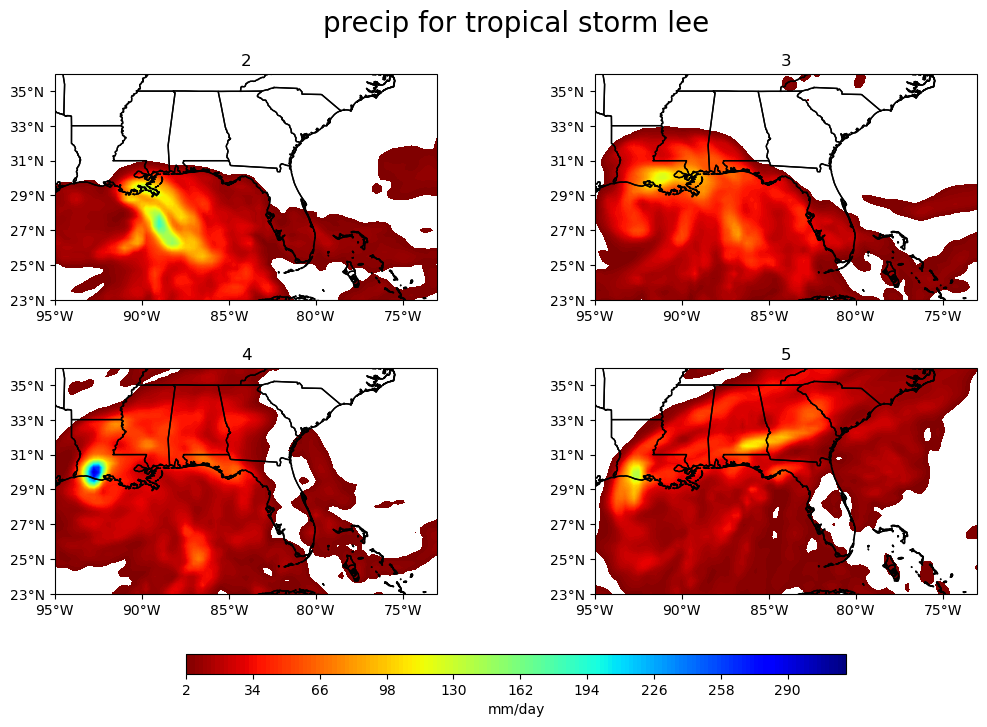

In [47]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,320,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=lee_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for tropical storm lee',fontsize=20)

# 2012 Plots

## Hurricane Isaac

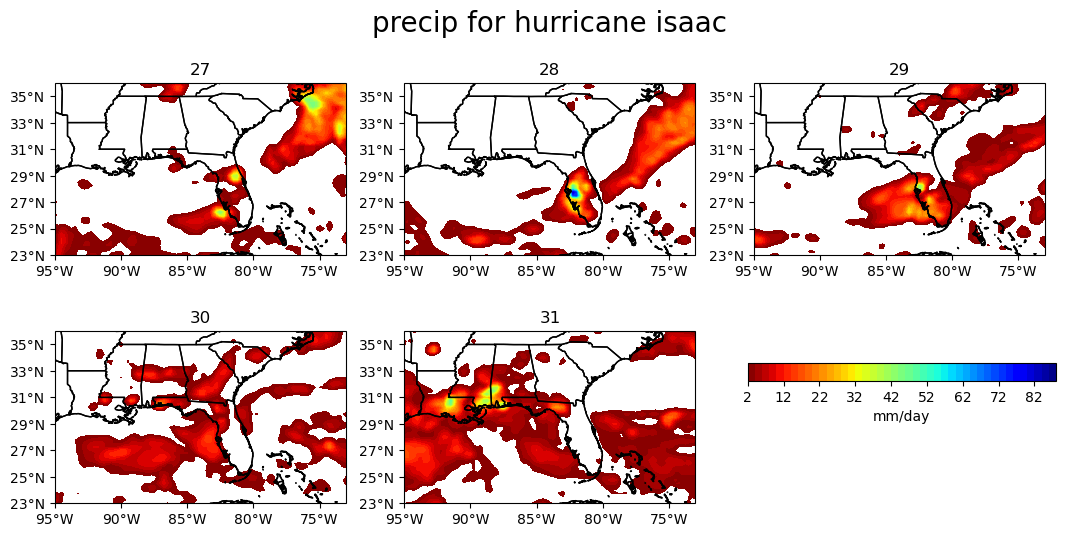

In [48]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,7))
clevs = np.arange(2,90,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,5):

        # Select the season
        data=isaac_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.68, 0.45, 0.28, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for hurricane isaac',fontsize=20)
axs[5].set_axis_off()

## Hurricane Sandy

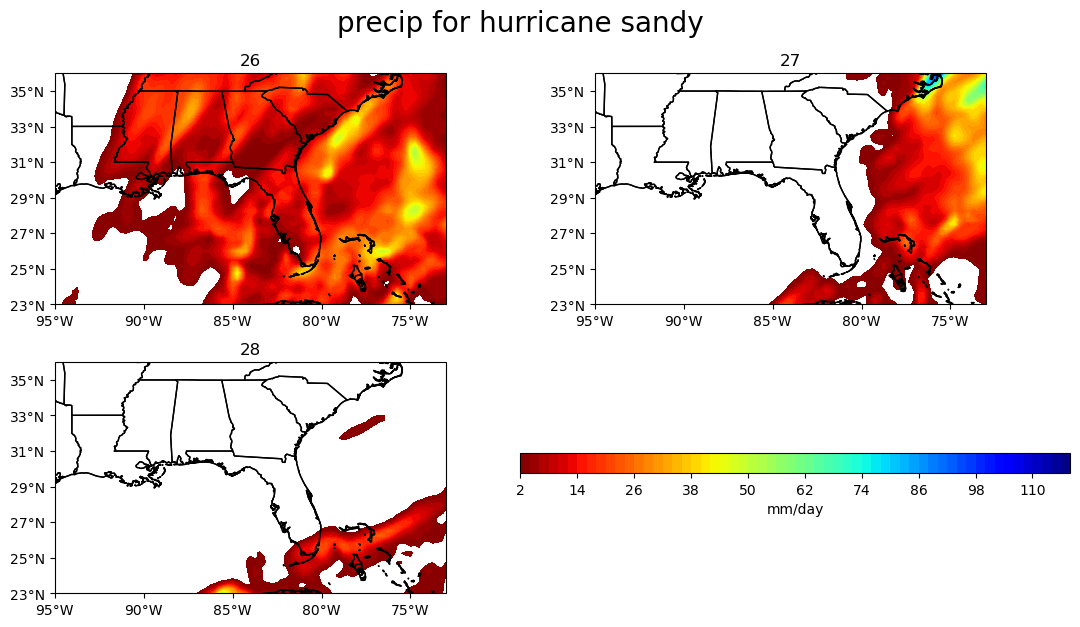

In [50]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,120,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=sandy_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for hurricane sandy',fontsize=20)
axs[3].set_axis_off()

# 2013 Plots

## Tropical Storm Karen

Text(0.5, 0.98, 'precip for tropical storm karen')

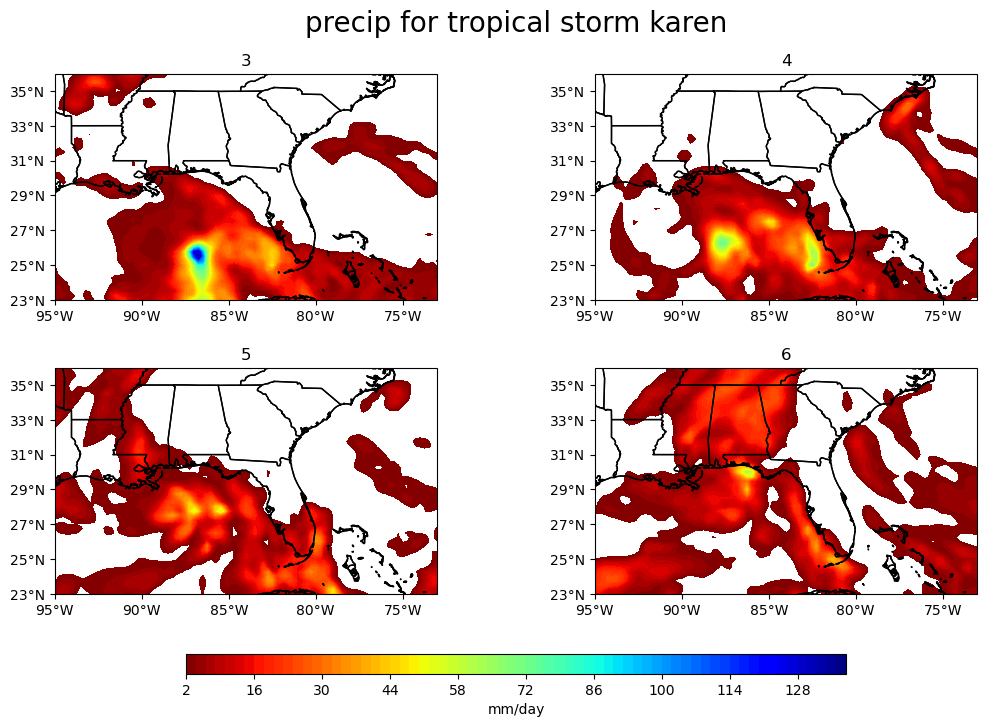

In [51]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,140,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=karen_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for tropical storm karen',fontsize=20)

# 2014 Plots

## Tropical Storm Bertha

Text(0.5, 0.98, 'precip for tropical storm bertha')

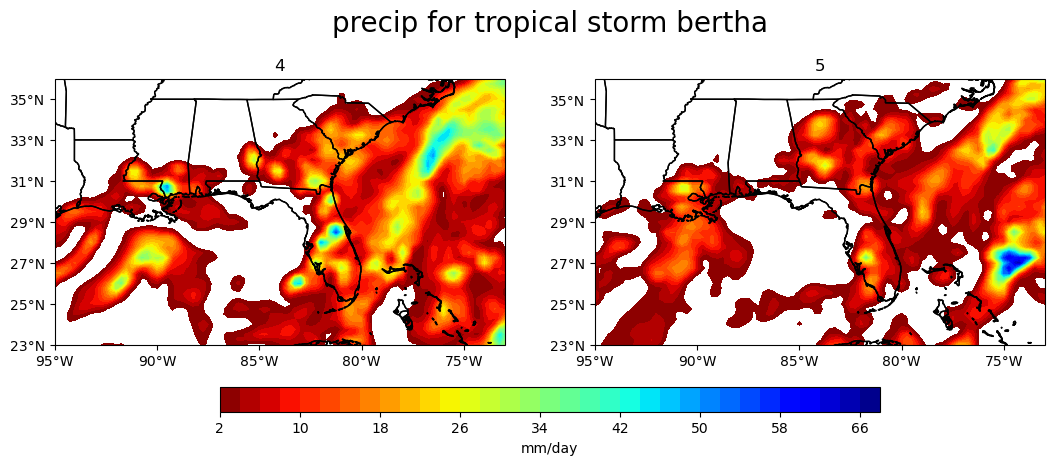

In [21]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(2,70,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=bertha_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for tropical storm bertha',fontsize=20)

# 2015 Plots

## Hurricane Joaquin

Text(0.5, 0.98, 'precip for hurricane joaquin')

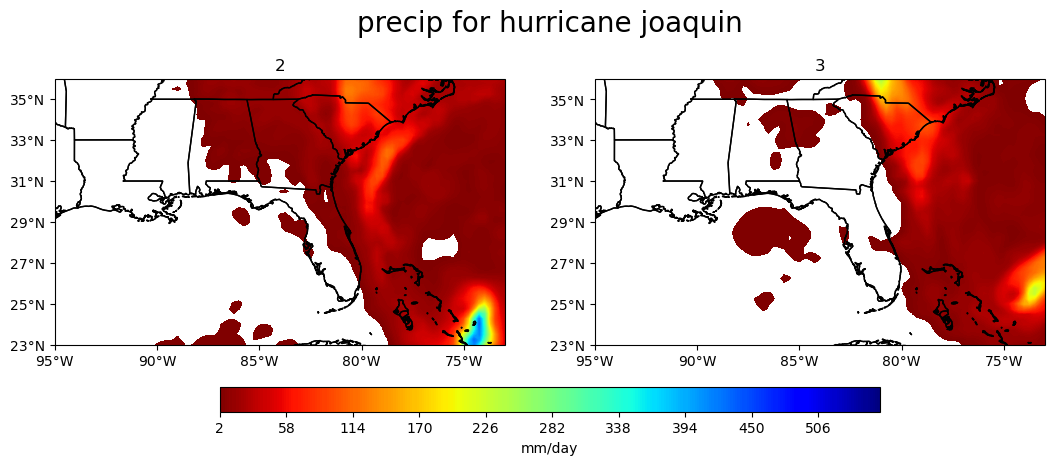

In [53]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
clevs = np.arange(2,560,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2):

        # Select the season
        data=joaquin_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.4)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for hurricane joaquin',fontsize=20)

# 2016 Plots

## Hurricane Hermine

Text(0.5, 0.98, 'precip for hurricane hermine, august')

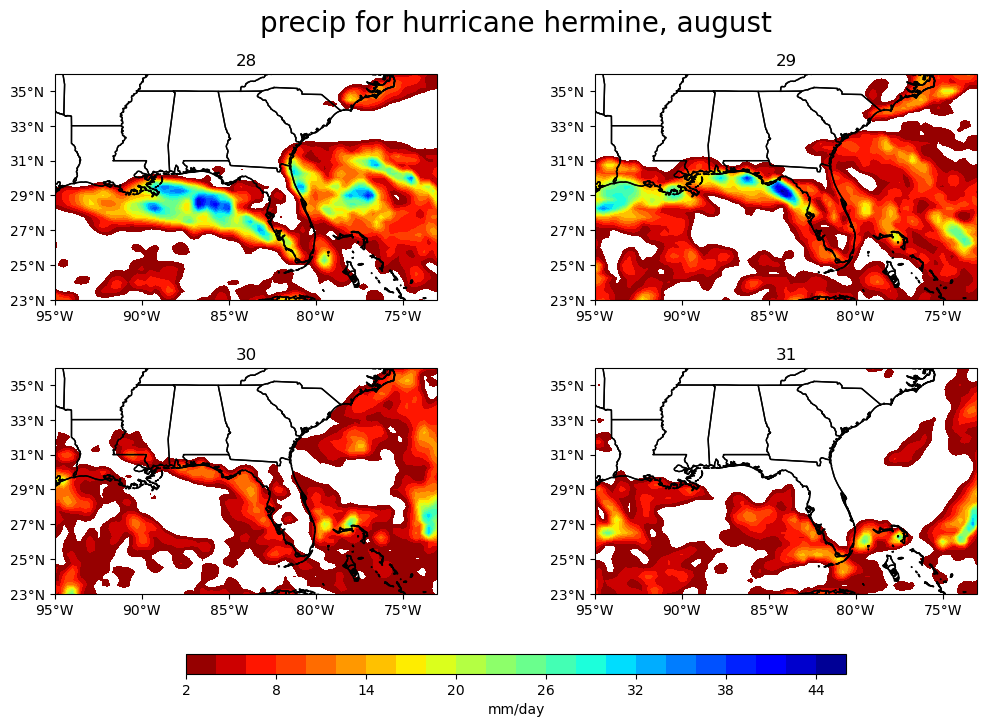

In [54]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,48,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,4):

        # Select the season
        data=hermine1_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for hurricane hermine, august',fontsize=20)

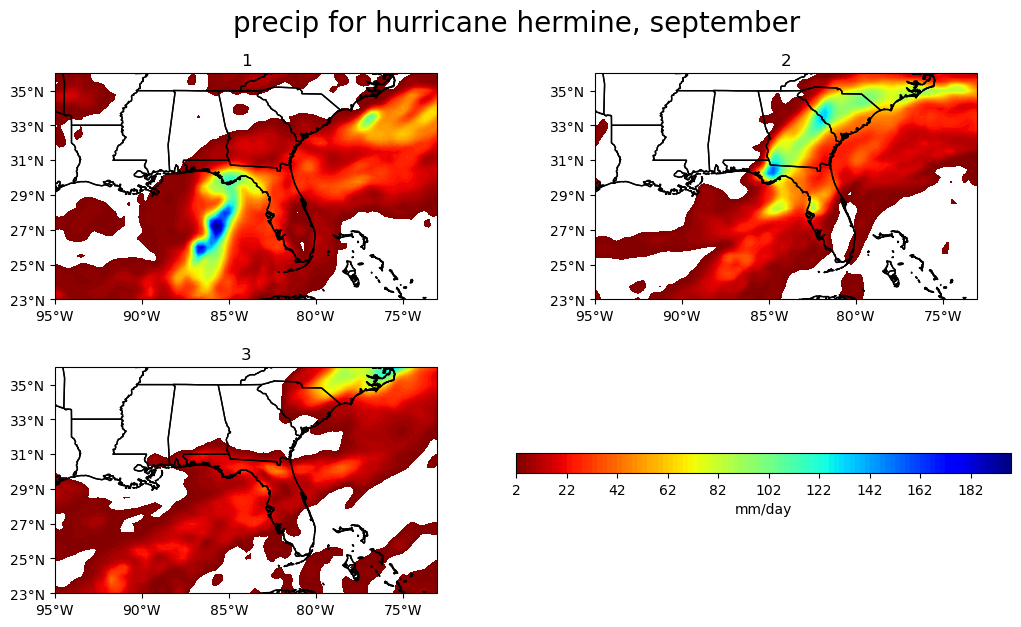

In [56]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,200,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=hermine2_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

cbar_ax = fig.add_axes([0.5, 0.4, 0.45, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for hurricane hermine, september',fontsize=20)
axs[3].set_axis_off()

## tropical storm julia

Text(0.5, 0.98, 'precip for tropical storm julia')

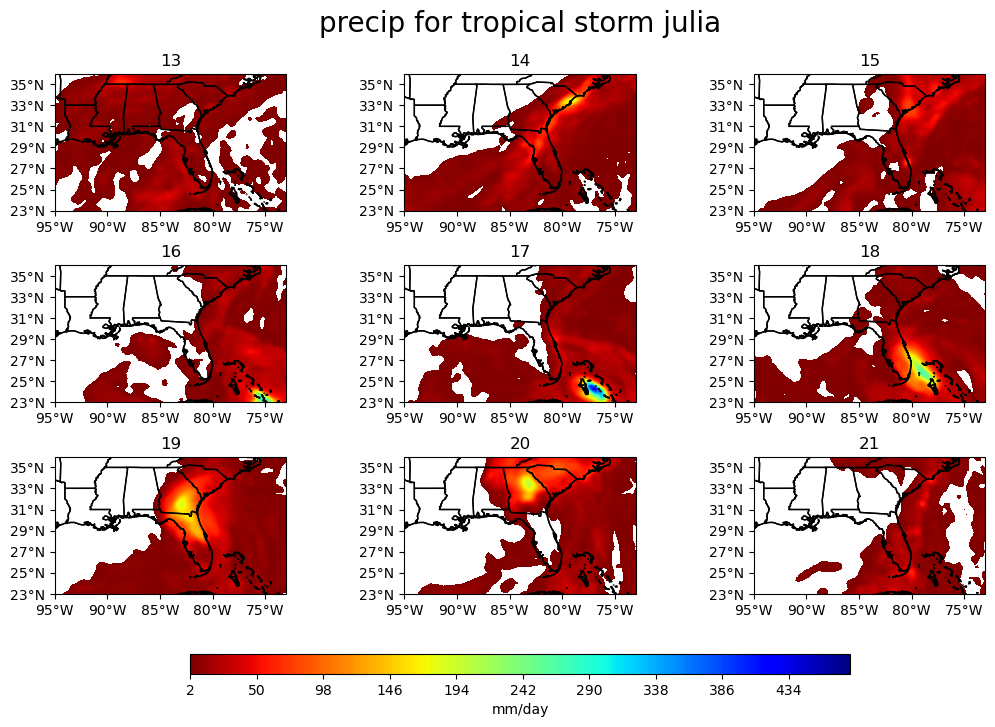

In [57]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,480,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,9):

        # Select the season
        data=julia_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.4)

cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.025])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for tropical storm julia',fontsize=20)

## Hurricane Matthew

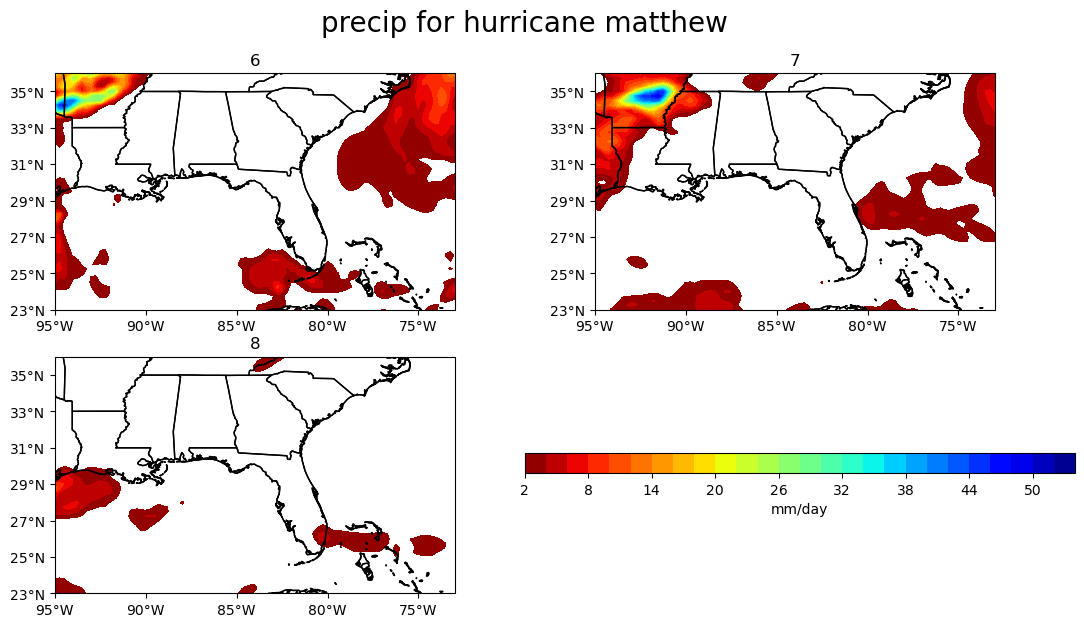

In [59]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
clevs = np.arange(2,56,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3):

        # Select the season
        data=matthew_days.precip[i,:,:]

        # Contour plot
        cs=axs[i].contourf(ds.precip['longitude'],ds.precip['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(data['time.date'].values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
        #.colorbar(cs)
        #axs[i].colorbar(cs, orientation='horizontal',label='K')
       
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.5, 0.4, 0.5, 0.025])
# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('precip for hurricane matthew',fontsize=20)

axs[3].set_axis_off()

# Observations:
Some of the precipitation plots show some sort of rotation almost, which is very interesting, and could definitely indicate some sort of cyclonic movement or system at that location.